In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

import os

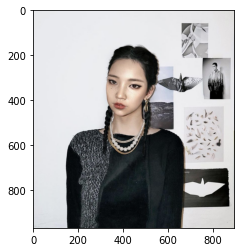

In [2]:
image_path = "../image/image2.png"
img_bgr = cv2.imread(image_path)
# img_bgr = cv2.resize(img_bgr, (640, 360))
img_show = img_bgr.copy()
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

In [3]:
import dlib
detector_hog = dlib.get_frontal_face_detector()
dlib_rects = detector_hog(img_rgb, 1)

print(dlib_rects)

rectangles[[(304, 284) (489, 469)]]


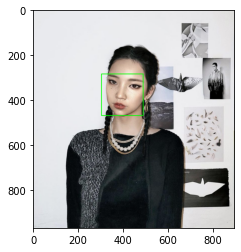

In [4]:
for rect in dlib_rects:
    l = rect.left()
    t = rect.top()
    r = rect.right()
    b = rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

68


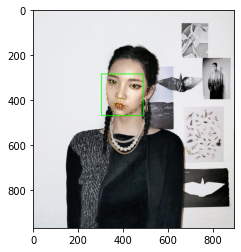

In [5]:
landmark_predictor = dlib.shape_predictor("../models/shape_predictor_68_face_landmarks.dat")

list_landmark = []
for rect in dlib_rects:
    points = landmark_predictor(img_rgb, rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmark.append(list_points)

print(len(list_landmark[0]))

for landmark in list_landmark:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)


img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()


In [6]:
for dlib_rect, landmark in zip(dlib_rects, list_landmark):
    print (landmark[30]) # nose center index : 30
    x = landmark[30][0]
    y = landmark[30][1] - dlib_rect.width()//2
    w = dlib_rect.width()
    h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(385, 384)
(x,y) : (385,291)
(w,h) : (186,186)


In [7]:
sticker_path = '../image/king.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)

(186, 186, 3)


In [8]:
refined_x = x - w // 2  # left
refined_y = y - h       # top
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (292,105)


In [9]:
# img_sticker = img_sticker[-refined_y:]
# print (img_sticker.shape)

# refined_y = 0
# print ('(x,y) : (%d,%d)'%(refined_x, refined_y))
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
# print(img_sticker.shape)
# print(refined_y, img_sticker.shape[0])
# print(sticker_area.shape)
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,sticker_area,img_sticker).astype(np.uint8)

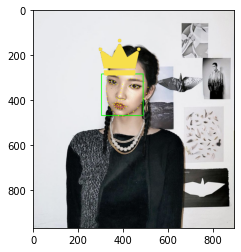

In [10]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

In [11]:
sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

ValueError: operands could not be broadcast together with shapes (186,186,3) (81,186,3) (186,186,3) 